# Business Understanding

Option #1

Kickstarter wants to help make more projects successful (meet funding goal) because when projects are successful Kickstarter gets a cut of the funding. We rank the importance of features to get an understanding of what makes a project successful.  How much does staff_pick or spotlight influence the success? Time of launch-deadline? Category listings? Should we market ourselves to xxx, who is the most successful?

Option #2 

We have an idea we want to kickstart, is it critical that we have good rewards/get spotlight/get backers/ how long should the deadline be etc to hit a successful funding goal.



# Imports

In [173]:
import sys
import os
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join(os.pardir))
import json
from datetime import datetime as dt
if module_path not in sys.path:
    sys.path.append(module_path)
pd.set_option('max_columns', None)

# EDA

In [2]:
# df = pd.DataFrame()
# for f in glob('../data/Kickstarter*.csv'):
#     df = pd.concat([df, pd.read_csv(f)])

In [3]:
# df.info()
# df.to_csv('..data/Kickstarter_full.csv', index = False)

In [4]:
df = pd.read_csv('../data/Kickstarter_full.csv')

In [5]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,2,I am building a website as a platform for stud...,"{""id"":362,""name"":""Makerspaces"",""slug"":""technol...",8,AU,Australia,1526014096,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,$,True,USD,1528928562,False,NaN,0.713110,1000.0,2116213542,NaN,False,NaN,1526336562,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,NaN,"{""key"":""assets/021/192/015/169fac7e245d13c5b2c...",11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,1528928562,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic
1,43,"For my first solo museum exhibition, I'm const...","{""id"":288,""name"":""Installations"",""slug"":""art/i...",3390,US,the United States,1490746168,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,$,True,USD,1493819063,False,NaN,1.000000,3000.0,162726099,NaN,False,NaN,1491227063,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,NaN,"{""key"":""assets/016/043/280/779386fd82d6830e626...",3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,1493819064,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic
2,243,"Jenn lives in an underground bunker, protected...","{""id"":302,""name"":""Thrillers"",""slug"":""film & vi...",28601,US,the United States,1411536270,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,$,True,USD,1415844585,False,NaN,1.000000,16500.0,1678056872,NaN,False,NaN,1413248985,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,NaN,"{""key"":""assets/011/877/406/34b5aa93986724b6374...",28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,1415844587,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic
3,2,I want to create a book that displays my work ...,"{""id"":278,""name"":""People"",""slug"":""photography/...",26,US,the United States,1420492380,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,$,True,USD,1423192306,False,NaN,1.000000,5000.0,1972792590,NaN,False,NaN,1420600306,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,NaN,"{""key"":""assets/011/991/354/8497459c8c1bef38223...",26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,1423192306,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic
4,210,A series of hard enamel pins and accessories,"{""id"":26,""name"":""Crafts"",""slug"":""crafts"",""posi...",6516,GB,the United Kingdom,1593683203,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,£,False,USD,1598633946,False,NaN,1.301187,1000.0,928655800,NaN,False,NaN,1596214746,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,NaN,"{""key"":""assets/029/762/429/cfde26eb92bacd30e93...",4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,1598633946,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic


In [6]:
df.state.value_counts(normalize = True)

successful    0.582305
failed        0.344952
canceled      0.041410
live          0.031334
Name: state, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219538 entries, 0 to 219537
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             219538 non-null  int64  
 1   blurb                     219532 non-null  object 
 2   category                  219538 non-null  object 
 3   converted_pledged_amount  219538 non-null  int64  
 4   country                   219538 non-null  object 
 5   country_displayable_name  219538 non-null  object 
 6   created_at                219538 non-null  int64  
 7   creator                   219538 non-null  object 
 8   currency                  219538 non-null  object 
 9   currency_symbol           219538 non-null  object 
 10  currency_trailing_code    219538 non-null  bool   
 11  current_currency          219538 non-null  object 
 12  deadline                  219538 non-null  int64  
 13  disable_communication     219538 non-null  b

# Data Cleaning

In [8]:
country_names = list(df.country_displayable_name.value_counts().index)
country_codes = list(df.country.value_counts().index)
countries = list(zip(country_names, country_codes))

From the .info we see a few columns that can be dropped because they don't have enough data

- `friend`
- `is_backing`
- `is_starred`
- `permission`

Additionally, there are a few unneeded or redundant columns
- `photo`
- `id`
- `currency_symbol`
- `country_displayable_name`
- `disable_communication`
- `fx_rate`
- `converted_pledged_amount`
- `currency_trailing_code`
- `current_currency`

In [9]:
df = df.drop(columns = ['friends',
                        'is_backing',
                        'is_starred',
                        'permissions',
                        'photo',
                        'id',
                        'currency_symbol',
                        'country_displayable_name',
                        'disable_communication',
                        'converted_pledged_amount',
                        'fx_rate',
                        'currency_trailing_code',
                        'current_currency'
                       ]
            )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219538 entries, 0 to 219537
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   backers_count     219538 non-null  int64  
 1   blurb             219532 non-null  object 
 2   category          219538 non-null  object 
 3   country           219538 non-null  object 
 4   created_at        219538 non-null  int64  
 5   creator           219538 non-null  object 
 6   currency          219538 non-null  object 
 7   deadline          219538 non-null  int64  
 8   goal              219538 non-null  float64
 9   is_starrable      219538 non-null  bool   
 10  launched_at       219538 non-null  int64  
 11  location          219332 non-null  object 
 12  name              219538 non-null  object 
 13  pledged           219538 non-null  float64
 14  profile           219538 non-null  object 
 15  slug              219538 non-null  object 
 16  source_url        21

To deal with potential duplicate entries, rows with the same `blurb` and `launched_at` timestamp are dropped

In [11]:
df = df.drop_duplicates(subset = ['blurb', 'launched_at'])

We need to convert the date columns with object dtype unix timestamps into datetime objects.

In [12]:
df.created_at = df.created_at.apply(lambda x: dt.fromtimestamp(x))
df.launched_at = df.launched_at.apply(lambda x: dt.fromtimestamp(x))
df.deadline = df.deadline.apply(lambda x: dt.fromtimestamp(x))
df.state_changed_at = df.state_changed_at.apply(lambda x: dt.fromtimestamp(x))

To convert the `goal` feature into a consistent currency, the `usd_goal` is created using `static_usd_rate`

In [13]:
df['usd_goal'] = df.static_usd_rate * df.goal

In [14]:
df.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,is_starrable,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal
0,2,I am building a website as a platform for stud...,"{""id"":362,""name"":""Makerspaces"",""slug"":""technol...",AU,2018-05-11 00:48:16,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,2018-06-13 18:22:42,1000.0,False,2018-05-14 18:22:42,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,2018-06-13 18:22:42,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic,754.09094
1,43,"For my first solo museum exhibition, I'm const...","{""id"":288,""name"":""Installations"",""slug"":""art/i...",US,2017-03-28 20:09:28,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,2017-05-03 09:44:23,3000.0,False,2017-04-03 09:44:23,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,2017-05-03 09:44:24,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic,3000.00000
2,243,"Jenn lives in an underground bunker, protected...","{""id"":302,""name"":""Thrillers"",""slug"":""film & vi...",US,2014-09-24 01:24:30,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,2014-11-12 21:09:45,16500.0,False,2014-10-13 21:09:45,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,2014-11-12 21:09:47,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic,16500.00000
3,2,I want to create a book that displays my work ...,"{""id"":278,""name"":""People"",""slug"":""photography/...",US,2015-01-05 16:13:00,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,2015-02-05 22:11:46,5000.0,False,2015-01-06 22:11:46,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-02-05 22:11:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic,5000.00000
4,210,A series of hard enamel pins and accessories,"{""id"":26,""name"":""Crafts"",""slug"":""crafts"",""posi...",GB,2020-07-02 05:46:43,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,2020-08-28 12:59:06,1000.0,False,2020-07-31 12:59:06,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-08-28 12:59:06,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic,1298.42475


In [15]:
df.currency.value_counts()

USD    133128
GBP     21420
EUR     14356
CAD      9035
AUD      4546
MXN      2775
SEK      1351
HKD      1203
NZD       856
DKK       843
SGD       736
CHF       666
JPY       490
NOK       466
PLN         4
Name: currency, dtype: int64

In [16]:
df.creator = df.creator.apply(lambda x: x.replace(' "', " ").replace('" '," "))

In [17]:
for i,creator in enumerate(df.creator):
    print(i)
    json.loads(creator)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087


JSONDecodeError: Expecting ',' delimiter: line 1 column 56 (char 55)

In [18]:
df.creator.iloc[4091] = '{"id":1109996217,"name":"Brianna Hairlson, Bri Cherise","is_registered":null,"is_email_verified":null,"chosen_currency":null,"is_superbacker":null,"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/021/691/777/797dd33378c76e2d5cd17ea9a9094f31_original.jpeg?ixlib=rb-2.1.0&w=40&h=40&fit=crop&v=1529970497&auto=format&frame=1&q=92&s=88fed777551b7fcd30d813b1ece9d14b","small":"https://ksr-ugc.imgix.net/assets/021/691/777/797dd33378c76e2d5cd17ea9a9094f31_original.jpeg?ixlib=rb-2.1.0&w=80&h=80&fit=crop&v=1529970497&auto=format&frame=1&q=92&s=21d00279c93d6a9027d5bf1fc6f8ff4d","medium":"https://ksr-ugc.imgix.net/assets/021/691/777/797dd33378c76e2d5cd17ea9a9094f31_original.jpeg?ixlib=rb-2.1.0&w=160&h=160&fit=crop&v=1529970497&auto=format&frame=1&q=92&s=69da0a09bd51286ffb76997955a41bae"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/1109996217"},"api":{"user":"https://api.kickstarter.com/v1/users/1109996217?signature=1602823015.92c183e6eccaea82d64c33248f8ac8732a9af193"}}}'

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
df.creator.iloc[4091]

'{"id":1109996217,"name":"Brianna Hairlson, Bri Cherise","is_registered":null,"is_email_verified":null,"chosen_currency":null,"is_superbacker":null,"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/021/691/777/797dd33378c76e2d5cd17ea9a9094f31_original.jpeg?ixlib=rb-2.1.0&w=40&h=40&fit=crop&v=1529970497&auto=format&frame=1&q=92&s=88fed777551b7fcd30d813b1ece9d14b","small":"https://ksr-ugc.imgix.net/assets/021/691/777/797dd33378c76e2d5cd17ea9a9094f31_original.jpeg?ixlib=rb-2.1.0&w=80&h=80&fit=crop&v=1529970497&auto=format&frame=1&q=92&s=21d00279c93d6a9027d5bf1fc6f8ff4d","medium":"https://ksr-ugc.imgix.net/assets/021/691/777/797dd33378c76e2d5cd17ea9a9094f31_original.jpeg?ixlib=rb-2.1.0&w=160&h=160&fit=crop&v=1529970497&auto=format&frame=1&q=92&s=69da0a09bd51286ffb76997955a41bae"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/1109996217"},"api":{"user":"https://api.kickstarter.com/v1/users/1109996217?signature=1602823015.92c183e6eccaea82d64c33248f8ac8732a9af193"}}}'

In [20]:
df.creator.apply(lambda x: int(x[6:17].strip('nameY').strip('"').strip(',')))

ValueError: invalid literal for int() with base 10: '8,"name":'

In [88]:
df.category = df.category.apply(json.loads)

In [90]:
df['category_name'] = df.category.apply(lambda x: x['name'])

In [94]:
df.category[0]

{'id': 362,
 'name': 'Makerspaces',
 'slug': 'technology/makerspaces',
 'position': 9,
 'parent_id': 16,
 'parent_name': 'Technology',
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/makerspaces'}}}

## Feature Engineering

- has prior success
- rate of funding (fast funder, slow funder)
- # of words in blurb


#### Has prior success

From the creator dictionary string, the user id is pulled, and then that id is used to check if that user has more than 1 successful campaign.

In [21]:
def checkit(string):
    i = 0
    for letter in string:
        if letter.isdigit():
            i += 1
        else:
            break
    return i
df['creator_id'] = df.creator.apply(lambda x: int(x[6:6+checkit(x[6:])]))
temp = df.creator_id.value_counts()
df['has_prior_success'] = [1 if temp.loc[x] > 1 else 0 for x in df.creator_id]

In [22]:
df.has_prior_success.value_counts()

0    147580
1     44295
Name: has_prior_success, dtype: int64

#### Project length

We want to determine if the length of a project has an effect on the success of the campaign.

In [23]:
df['project_length'] = df.deadline - df.launched_at

In [24]:
len(df.blurb[0].split())

21

#### Blurb Length

To see if the number of words in the blurb is important to the success of a project.

In [25]:
df['blurb_length'] = [len(str(x).split()) for x in df.blurb]

#### Pledge per backer

In [26]:
df.backers_count.value_counts()

0       15885
1       15434
2       10694
3        7331
4        5255
        ...  
2373        1
4422        1
6599        1
3013        1
1726        1
Name: backers_count, Length: 3410, dtype: int64

In [27]:
df['pledge_per_backer'] = np.where(df.backers_count == 0, 0, df.usd_pledged / df.backers_count)

#### Goal timedelta

In [28]:
df['goal_needed_per_day'] = df.usd_goal / df.project_length.apply(lambda x: x.days)

In [29]:
df['raised_per_day'] = df.usd_pledged / df.project_length.apply(lambda x: x.days)

In [30]:
df.columns

Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'creator', 'currency', 'deadline', 'goal', 'is_starrable',
       'launched_at', 'location', 'name', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'usd_goal',
       'creator_id', 'has_prior_success', 'project_length', 'blurb_length',
       'pledge_per_backer', 'goal_needed_per_day', 'raised_per_day'],
      dtype='object')

In [31]:
df.usd_type.value_counts()

domestic         146370
international     45263
Name: usd_type, dtype: int64

In [32]:
df.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,is_starrable,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal,creator_id,has_prior_success,project_length,blurb_length,pledge_per_backer,goal_needed_per_day,raised_per_day
0,2,I am building a website as a platform for stud...,"{""id"":362,""name"":""Makerspaces"",""slug"":""technol...",AU,2018-05-11 00:48:16,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,2018-06-13 18:22:42,1000.0,False,2018-05-14 18:22:42,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,2018-06-13 18:22:42,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic,754.09094,576665900,0,30 days,21,4.268155,25.136365,0.284544
1,43,"For my first solo museum exhibition, I'm const...","{""id"":288,""name"":""Installations"",""slug"":""art/i...",US,2017-03-28 20:09:28,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,2017-05-03 09:44:23,3000.0,False,2017-04-03 09:44:23,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,2017-05-03 09:44:24,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic,3000.00000,1570512397,0,30 days,21,78.837209,100.000000,113.000000
2,243,"Jenn lives in an underground bunker, protected...","{""id"":302,""name"":""Thrillers"",""slug"":""film & vi...",US,2014-09-24 01:24:30,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,2014-11-12 21:09:45,16500.0,False,2014-10-13 21:09:45,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,2014-11-12 21:09:47,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic,16500.00000,579435811,0,30 days,23,117.700041,550.000000,953.370333
3,2,I want to create a book that displays my work ...,"{""id"":278,""name"":""People"",""slug"":""photography/...",US,2015-01-05 16:13:00,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,2015-02-05 22:11:46,5000.0,False,2015-01-06 22:11:46,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-02-05 22:11:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic,5000.00000,528048907,0,30 days,28,13.000000,166.666667,0.866667
4,210,A series of hard enamel pins and accessories,"{""id"":26,""name"":""Crafts"",""slug"":""crafts"",""posi...",GB,2020-07-02 05:46:43,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,2020-08-28 12:59:06,1000.0,False,2020-07-31 12:59:06,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-08-28 12:59:06,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic,1298.42475,926607047,1,28 days,8,30.414054,46.372312,228.105405


## Visualizations

In [36]:
df.state.value_counts().index

Index(['successful', 'failed', 'canceled', 'live'], dtype='object')

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


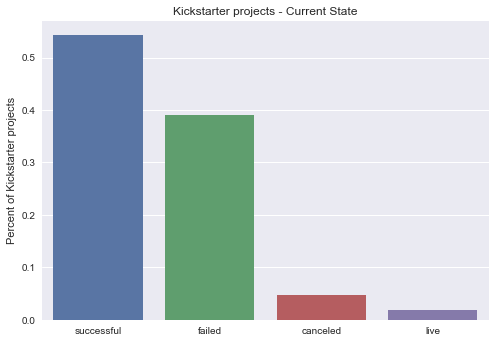

In [42]:
plt.style.use('seaborn')
sns.barplot(df.state.value_counts().index,df.state.value_counts(normalize=True))
plt.gca().set_ylabel('Percent of Kickstarter projects')
plt.gca().set_title('Kickstarter projects - Current State');

In [47]:
df.describe()

,backers_count,goal,pledged,static_usd_rate,usd_pledged,usd_goal,creator_id,has_prior_success,project_length,blurb_length,pledge_per_backer,goal_needed_per_day,raised_per_day
count,191875.000000,1.918750e+05,1.918750e+05,191875.000000,1.918750e+05,1.918750e+05,1.918750e+05,191875.000000,191875,191875.000000,191875.000000,1.918750e+05,191875.000000
mean,143.192078,5.658185e+04,2.523714e+04,1.002913,1.297071e+04,4.444230e+04,1.073746e+09,0.230853,33 days 04:02:10.745084039,18.206416,71.626206,1.413972e+03,416.309390
std,931.486798,1.326879e+06,1.332593e+06,0.238635,1.044167e+05,1.220692e+06,6.206653e+08,0.421380,12 days 05:34:32.900475016,5.484321,141.394844,6.052567e+04,3320.093268
min,0.000000,1.000000e+00,0.000000e+00,0.008771,0.000000e+00,5.114279e-01,3.000000e+00,0.000000,1 days 00:00:00,1.000000,0.000000,1.072667e-02,0.000000
25%,3.000000,1.500000e+03,1.000000e+02,1.000000,9.000000e+01,1.500000e+03,5.354431e+08,0.000000,30 days 00:00:00,15.000000,19.556111,5.000000e+01,2.633333
50%,25.000000,5.000000e+03,1.442000e+03,1.000000,1.392000e+03,5.000000e+03,1.073968e+09,0.000000,30 days 00:00:00,19.000000,44.803922,1.555556e+02,48.094220
75%,86.000000,1.500000e+04,6.600000e+03,1.000000,6.245000e+03,1.300000e+04,1.611487e+09,0.000000,35 days 00:00:00,22.000000,82.546691,4.166667e+02,212.976643
max,105857.000000,1.000000e+08,4.816218e+08,1.716408,1.296961e+07,1.523501e+08,2.147483e+09,1.000000,97 days 18:45:46,43.000000,10000.000000,1.375000e+07,418374.451613


In [56]:
matrix_df = df[['backers_count','usd_pledged','usd_goal','blurb_length','has_prior_success',
       'pledge_per_backer', 'goal_needed_per_day', 'raised_per_day','state']].copy()

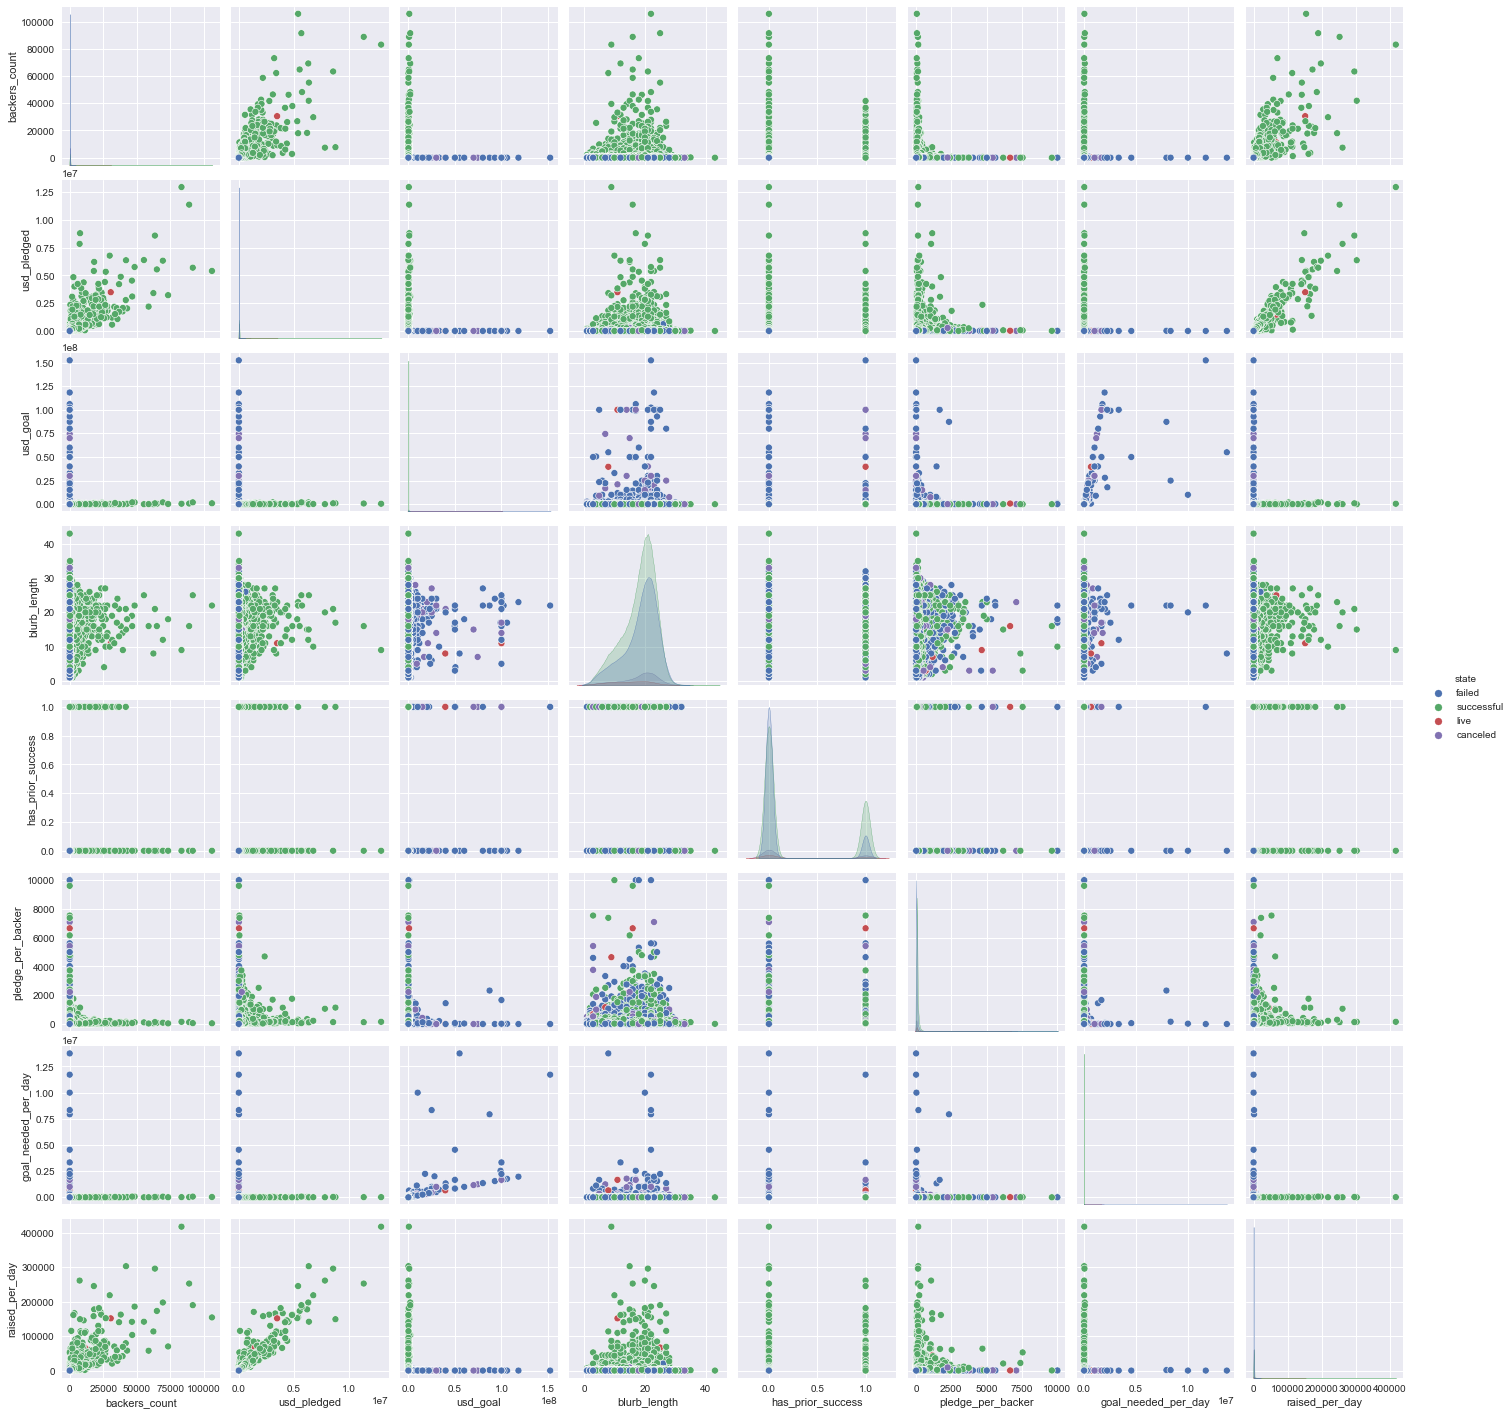

In [57]:
sns.pairplot(matrix_df,hue='state')

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='usd_goal'>

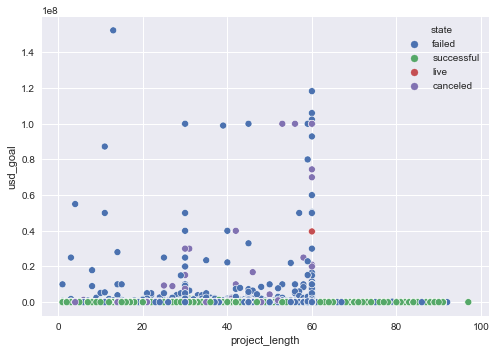

In [48]:
#no successful projects over $100,000 goal
sns.scatterplot(df.project_length.apply(lambda x: x.days),df.usd_goal,hue=df.state)

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='pledged'>

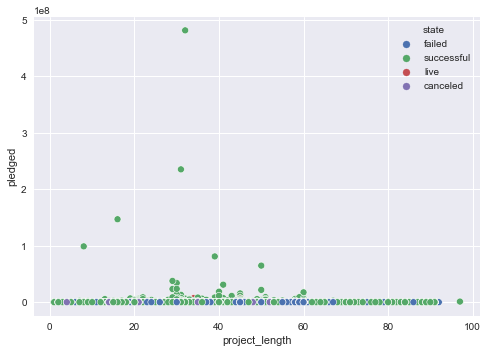

In [49]:
sns.scatterplot(df.project_length.apply(lambda x: x.days),df.pledged,hue=df.state)

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='backers_count'>

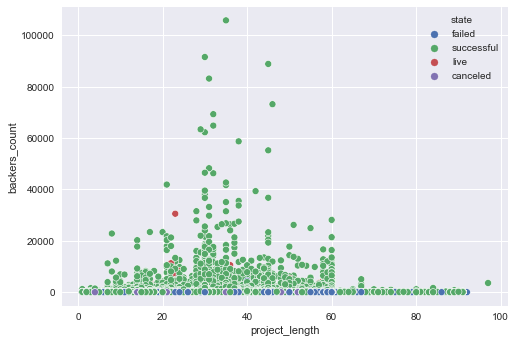

In [50]:
sns.scatterplot(df.project_length.apply(lambda x: x.days),df.backers_count,hue=df.state)

<AxesSubplot:xlabel='backers_count', ylabel='usd_goal'>

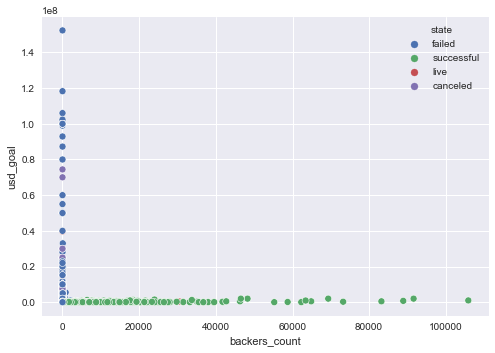

In [58]:
sns.scatterplot(x='backers_count',y='usd_goal',data=df,hue='state')

In [59]:
df_lim = df.copy()

In [60]:
df_lim.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,is_starrable,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal,creator_id,has_prior_success,project_length,blurb_length,pledge_per_backer,goal_needed_per_day,raised_per_day
0,2,I am building a website as a platform for stud...,"{""id"":362,""name"":""Makerspaces"",""slug"":""technol...",AU,2018-05-11 00:48:16,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,2018-06-13 18:22:42,1000.0,False,2018-05-14 18:22:42,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,2018-06-13 18:22:42,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic,754.09094,576665900,0,30 days,21,4.268155,25.136365,0.284544
1,43,"For my first solo museum exhibition, I'm const...","{""id"":288,""name"":""Installations"",""slug"":""art/i...",US,2017-03-28 20:09:28,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,2017-05-03 09:44:23,3000.0,False,2017-04-03 09:44:23,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,2017-05-03 09:44:24,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic,3000.00000,1570512397,0,30 days,21,78.837209,100.000000,113.000000
2,243,"Jenn lives in an underground bunker, protected...","{""id"":302,""name"":""Thrillers"",""slug"":""film & vi...",US,2014-09-24 01:24:30,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,2014-11-12 21:09:45,16500.0,False,2014-10-13 21:09:45,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,2014-11-12 21:09:47,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic,16500.00000,579435811,0,30 days,23,117.700041,550.000000,953.370333
3,2,I want to create a book that displays my work ...,"{""id"":278,""name"":""People"",""slug"":""photography/...",US,2015-01-05 16:13:00,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,2015-02-05 22:11:46,5000.0,False,2015-01-06 22:11:46,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-02-05 22:11:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic,5000.00000,528048907,0,30 days,28,13.000000,166.666667,0.866667
4,210,A series of hard enamel pins and accessories,"{""id"":26,""name"":""Crafts"",""slug"":""crafts"",""posi...",GB,2020-07-02 05:46:43,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,2020-08-28 12:59:06,1000.0,False,2020-07-31 12:59:06,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-08-28 12:59:06,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic,1298.42475,926607047,1,28 days,8,30.414054,46.372312,228.105405


In [70]:
df_lim.backers_count.quantile(.98)

1103.0

In [82]:
df_lim.backers_count = np.where(df_lim.backers_count > df_lim.backers_count.quantile(.98),
                                df_lim.backers_count.quantile(.98),
                                df_lim.backers_count)

df_lim.usd_goal = np.where(df_lim.usd_goal > df_lim.usd_goal.quantile(.98),
                                df_lim.usd_goal.quantile(.98),
                                df_lim.usd_goal)

df_lim.raised_per_day = np.where(df_lim.raised_per_day > df_lim.raised_per_day.quantile(.98),
                                df_lim.raised_per_day.quantile(.98),
                                df_lim.raised_per_day)

df_lim.pledge_per_backer = np.where(df_lim.pledge_per_backer > df_lim.pledge_per_backer.quantile(.98),
                                df_lim.pledge_per_backer.quantile(.98),
                                df_lim.pledge_per_backer)

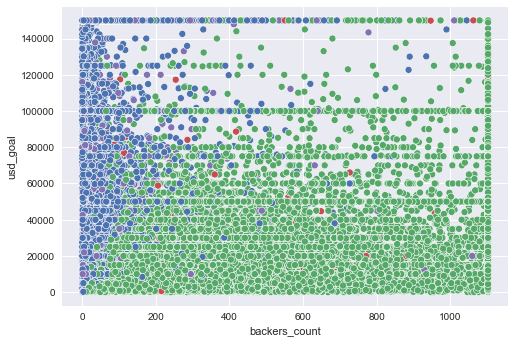

In [75]:
sns.scatterplot(x='backers_count',y='usd_goal',data=df_lim,hue='state');
plt.legend().remove()

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='backers_count'>

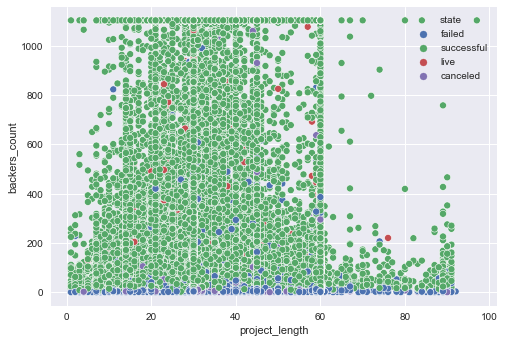

In [76]:
sns.scatterplot(df.project_length.apply(lambda x: x.days),df_lim.backers_count,hue=df_lim.state)

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='backers_count'>

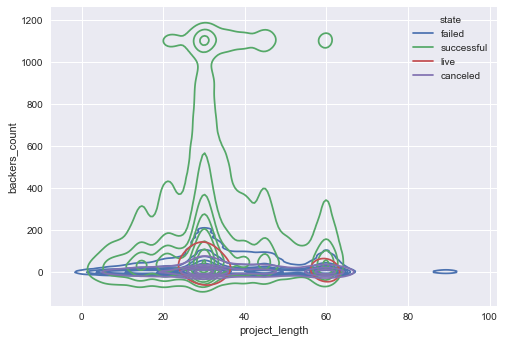

In [77]:
sns.kdeplot(df.project_length.apply(lambda x: x.days),df_lim.backers_count,hue=df_lim.state)

<AxesSubplot:xlabel='raised_per_day', ylabel='pledge_per_backer'>

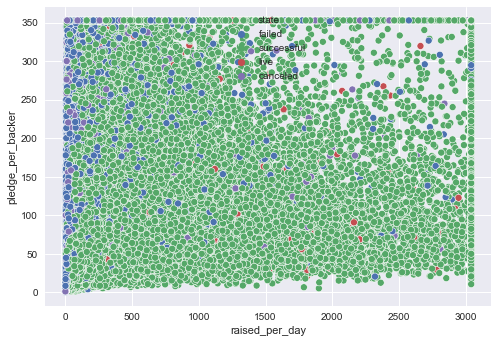

In [83]:
sns.scatterplot(x='raised_per_day',y='pledge_per_backer',data=df_lim,hue='state')

In [84]:
df.columns

Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'creator', 'currency', 'deadline', 'goal', 'is_starrable',
       'launched_at', 'location', 'name', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'usd_goal',
       'creator_id', 'has_prior_success', 'project_length', 'blurb_length',
       'pledge_per_backer', 'goal_needed_per_day', 'raised_per_day'],
      dtype='object')

In [103]:
numeric = ['backers_count', 'usd_pledged', 
           'usd_goal', 'blurb_length','pledge_per_backer', 'goal_needed_per_day', 'raised_per_day']

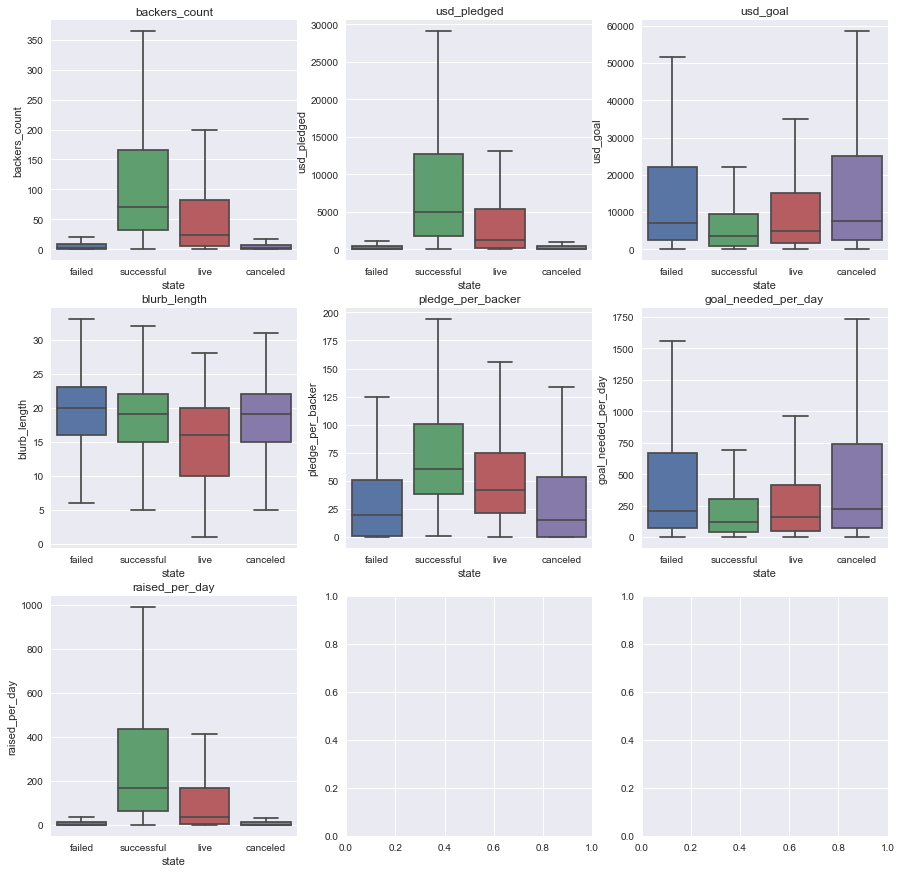

In [105]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i,col in enumerate(numeric):
    sns.boxplot(x='state',y=col,data=df,ax=ax[i//3][i%3], showfliers = False)
    ax[i//3][i%3].set_title(col)

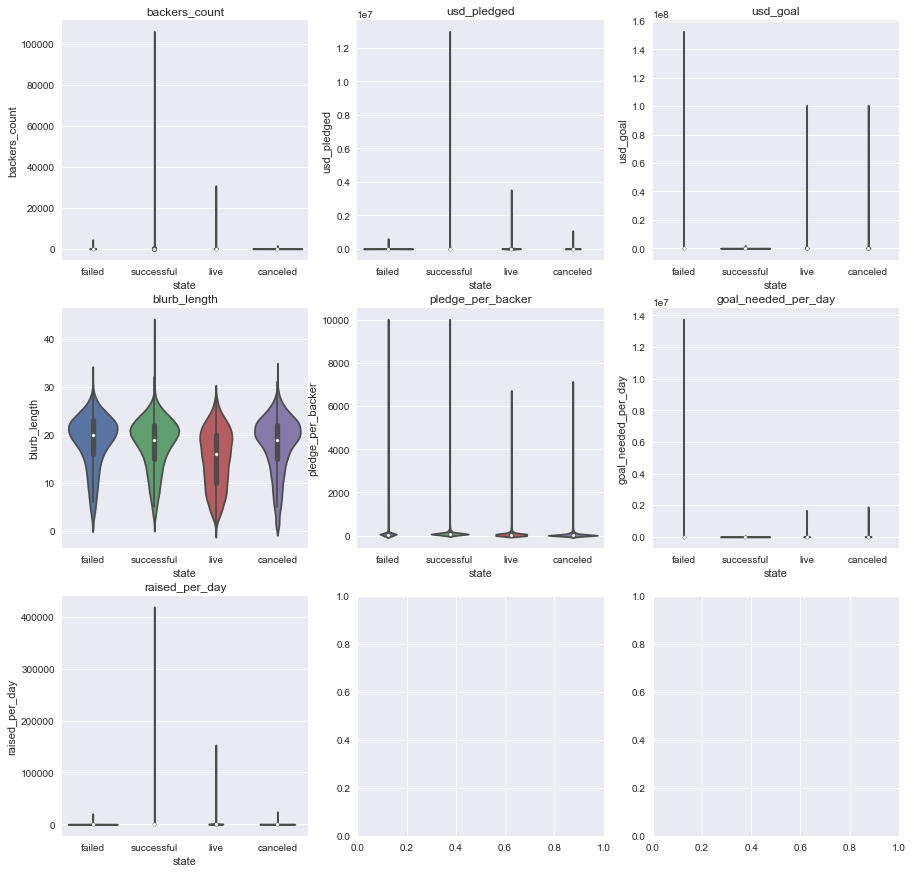

In [180]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i,col in enumerate(numeric):
    sns.violinplot(x='state',y=col,data=df,ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(col)

<AxesSubplot:xlabel='spotlight'>

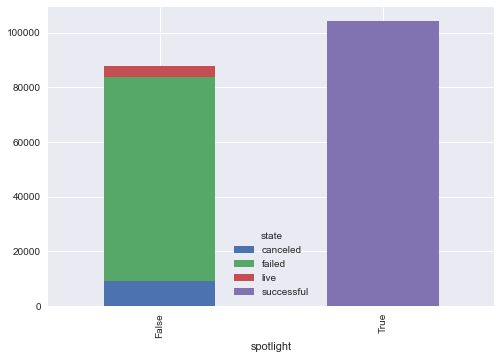

In [135]:
df.groupby(['spotlight']).state.value_counts().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='staff_pick'>

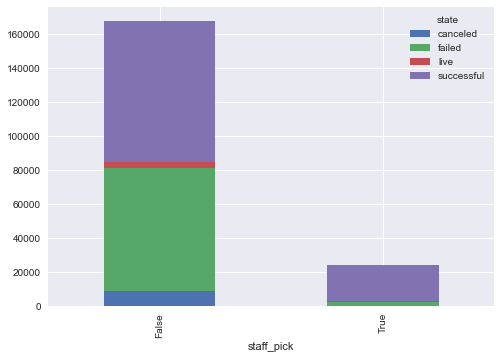

In [136]:
df.groupby(['staff_pick']).state.value_counts().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='staff_pick'>

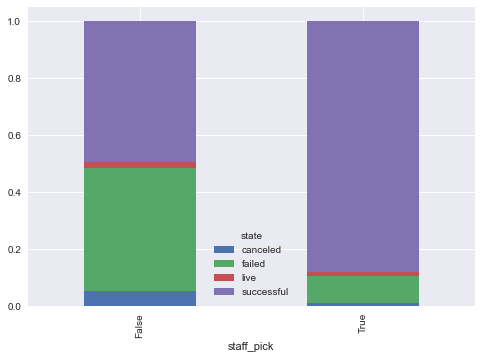

In [138]:
df.groupby(['staff_pick']).state.value_counts(normalize=True).unstack().plot.bar(stacked=True)

In [149]:
df.category_name.value_counts()[:50]

Web                 3936
Comedy              2930
Product Design      2401
Comic Books         2401
Apparel             2401
Public Art          2400
Nonfiction          2400
Gadgets             2400
Accessories         2400
Hip-Hop             2400
Indie Rock          2400
Tabletop Games      2400
Country & Folk      2400
Electronic Music    2400
Mixed Media         2400
Classical Music     2400
Fiction             2400
Rock                2400
Art Books           2400
Shorts              2400
Video Games         2400
Narrative Film      2400
Drama               2400
World Music         2400
Restaurants         2400
Hardware            2400
Children's Books    2400
Mobile Games        2400
Webseries           2400
Performance Art     2400
Graphic Novels      2400
Animation           2400
Apps                2400
Drinks              2400
Graphic Design      2400
Software            2400
Documentary         2400
Painting            2400
Pop                 2400
Illustration        2400


<Figure size 3600x720 with 0 Axes>

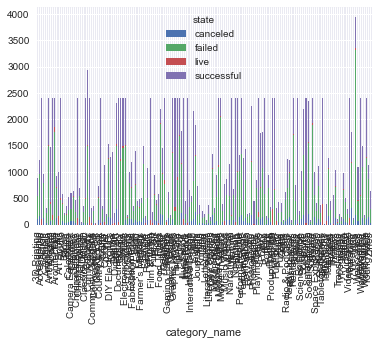

<Figure size 3600x720 with 0 Axes>

In [174]:

df.groupby(['category_name']).state.value_counts().unstack().plot.bar(stacked=True)
plt.figure(figsize=(50,10))